In [1]:
import numpy as np
import matplotlib.pyplot as plt

## draw the Ricker wavelet

([<matplotlib.axis.YTick at 0x108cc0cd0>,
 [Text(0, 0, ''), Text(0, 0, '')])

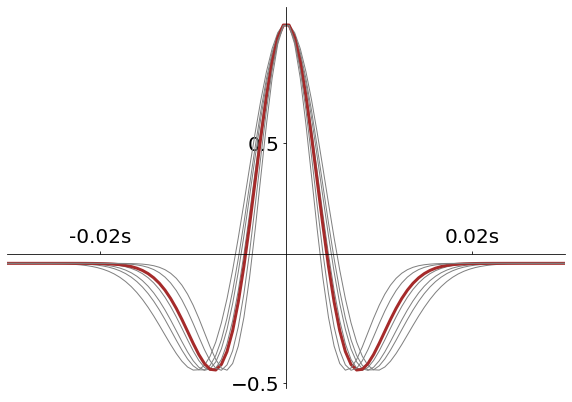

In [2]:
t = np.linspace(-0.03,0.03,100)


fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
fmi = [40,43,45,48,50,55,60]
for i in range(7):
    fm = fmi[i]
    a = (1-2*(np.pi*fm*t)*(np.pi*fm*t))*np.exp(-(np.pi*fm*t)*(np.pi*fm*t))
    if(fm==50):
        plt.plot(t,a,"brown",linewidth=3)
    else:
        plt.plot(t,a,"gray",linewidth=1)

plt.xlim(-0.03,0.03)
ax.spines['bottom'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('top')
ax.spines['top'].set_position(('data', 0.04))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

plt.rcParams['xtick.direction'] = 'out'
plt.xticks([-0.02, 0.02],["-0.02s","0.02s"],fontsize=20)
plt.yticks([0.5, -0.5],fontsize=20)
# plt.savefig("imgs/wavelet.png",bbox_inches='tight',dpi=300)

## draw the seismic image without noise

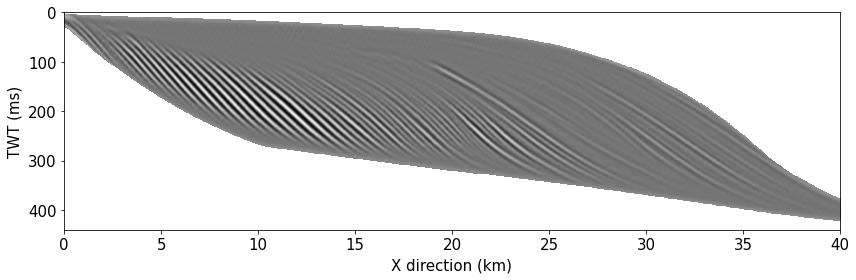

In [9]:
num = 0
plt.figure(figsize=(12,4))
mask = np.fromfile("./fsm/data/models/model"+str(num)+"/slope.dat",dtype=np.float32).reshape((1600,256))
vol = np.fromfile("./fsm/data/models/model"+str(num)+"/sp.dat",dtype=np.float32).reshape((1600,256))
vol = np.where(np.isnan(mask),np.nan,vol)
plt.imshow(vol.T,cmap="gray",aspect="auto",interpolation="bilinear")
plt.ylim(220,0)
plt.xticks([0,200,400,600,800,1000,1200,1400,1600],[0,5,10,15,20,25,30,35,40],fontsize=15)
plt.yticks([0,50,100,150,200],[0,100,200,300,400],fontsize=15)
plt.xlabel("X direction (km)",fontsize=15,labelpad=6)
plt.ylabel("TWT (ms)",fontsize=15,labelpad=6)
plt.tight_layout()
# plt.savefig("imgs/fig2-6-1.png",bbox_inches='tight',dpi=300)

## draw the seismic image with real noise

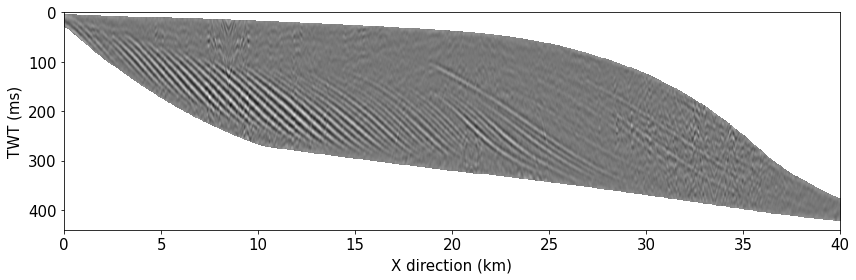

In [10]:
num = 0
plt.figure(figsize=(12,4))
mask = np.fromfile("./fsm/data/models/model"+str(num)+"/slope.dat",dtype=np.float32).reshape((1600,256))
vol = np.fromfile("./fsm/data/models/model"+str(num)+"/spns.dat",dtype=np.float32).reshape((1600,256))
vol = np.where(np.isnan(mask),np.nan,vol)
plt.imshow(vol.T,cmap="gray",aspect="auto",interpolation="bilinear")
plt.ylim(220,0)
plt.xticks([0,200,400,600,800,1000,1200,1400,1600],[0,5,10,15,20,25,30,35,40],fontsize=15)
plt.yticks([0,50,100,150,200],[0,100,200,300,400],fontsize=15)
plt.xlabel("X direction (km)",fontsize=15,labelpad=6)
plt.ylabel("TWT (ms)",fontsize=15,labelpad=6)
plt.tight_layout()
# plt.savefig("imgs/fig2-6-1.png",bbox_inches='tight',dpi=300)

## draw the RGT model

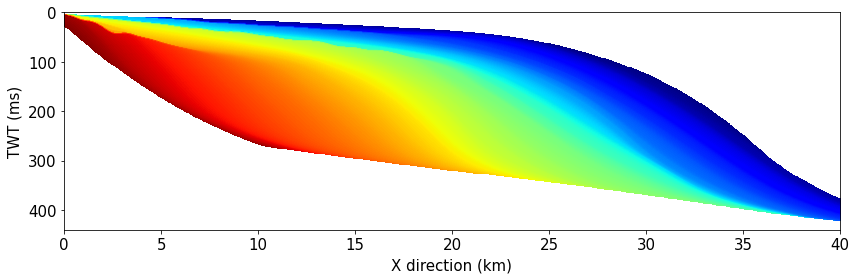

In [11]:
num = 0
plt.figure(figsize=(12,4))
mask = np.fromfile("./fsm/data/models/model"+str(num)+"/slope.dat",dtype=np.float32).reshape((1600,256))
vol = np.fromfile("./fsm/data/models/model"+str(num)+"/rgt.dat",dtype=np.float32).reshape((1600,256))
vol = np.where(np.isnan(mask),np.nan,vol)
plt.imshow(vol.T,cmap="jet",aspect="auto",interpolation="bilinear")
plt.ylim(220,0)
plt.xticks([0,200,400,600,800,1000,1200,1400,1600],[0,5,10,15,20,25,30,35,40],fontsize=15)
plt.yticks([0,50,100,150,200],[0,100,200,300,400],fontsize=15)
plt.xlabel("X direction (km)",fontsize=15,labelpad=6)
plt.ylabel("TWT (ms)",fontsize=15,labelpad=6)
plt.tight_layout()
# plt.savefig("imgs/fig2-6-1.png",bbox_inches='tight',dpi=300)

## create clinoform segmentation label

In [13]:
def write_cube2d(data, path):
    data = np.transpose(data, [0, 1]).astype(np.single)
    data.tofile(path) 
    
for i in range(1):
    print(i)
    slope = np.fromfile("./fsm/data/models/model"+str(num)+"/slope.dat",dtype=np.float32)
    slope = slope.reshape((1600,int(len(slope)/1600)))
    label = np.where(slope<0.017455,0,slope)
    label = np.where(slope>=0.017455,1,label)
    label = np.where(np.isnan(label),2,label)
    write_cube2d(label,"./fsm/data/models/model"+str(num)+"/label.dat")

0


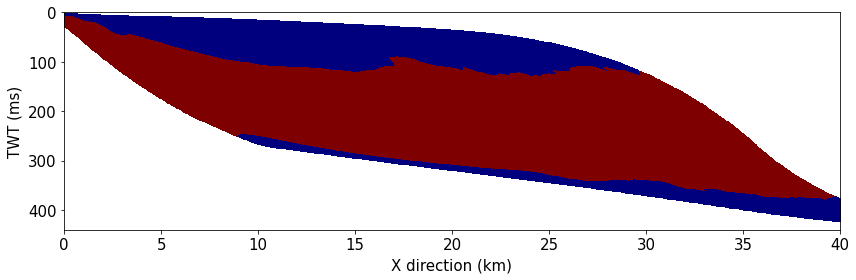

In [15]:
num = 0
plt.figure(figsize=(12,4))
mask = np.fromfile("./fsm/data/models/model"+str(num)+"/slope.dat",dtype=np.float32).reshape((1600,256))
vol = np.fromfile("./fsm/data/models/model"+str(num)+"/label.dat",dtype=np.float32).reshape((1600,256))
vol = np.where(np.isnan(mask),np.nan,vol)
plt.imshow(vol.T,cmap="jet",aspect="auto",interpolation="nearest")
plt.ylim(220,0)
plt.xticks([0,200,400,600,800,1000,1200,1400,1600],[0,5,10,15,20,25,30,35,40],fontsize=15)
plt.yticks([0,50,100,150,200],[0,100,200,300,400],fontsize=15)
plt.xlabel("X direction (km)",fontsize=15,labelpad=6)
plt.ylabel("TWT (ms)",fontsize=15,labelpad=6)
plt.tight_layout()
# plt.savefig("imgs/fig2-6-1.png",bbox_inches='tight',dpi=300)

## build structural smoothing layer

In [19]:
def convkernel(n1,n2,ag,w1,w2,u1,u2,sigu,sigv):
    m1 = w1*2+1
    m2 = w2*2+1
    conv = np.zeros((n1,n2,m1,m2))
    sigus = -1.0/(sigu*sigu)
    sigvs = -1.0/(sigv*sigv)
    for k1 in range(n1): 
        for k2 in range(n2):
            u1i = u1[k2][k1]
            u2i = u2[k2][k1]
            v1i = -u2i 
            v2i =  u1i
            sum = 0
            convk = np.zeros((m1,m2))
            for i1 in range(m1):
                d1 = i1-w1
                for i2 in range(m2):
                    d2 = i2-w2
                    du = u1i*d1+u2i*d2
                    dv = v1i*d1+v2i*d2
                    gs = du*du*sigus+dv*dv*sigvs
                    cx = ag*np.exp(gs)
                    convk[i1][i2] = cx
                    sum = sum+cx
            conv[k1,k2,:,:] = convk/sum
    return conv

def write_conv(data, path):
    data = np.transpose(data, [0, 1, 2, 3]).astype(np.single)
    data.tofile(path)

In [21]:
import numpy as np
n1,n2 = 256,1600
n1_4,n2_4 = round(n1/4),round(n2/4)
n1_16,n2_16 = round(n1/16),round(n2/16)
for i in range(1):
    u1_4 = np.fromfile("./fsm/data/models/model"+str(num)+"/u1_4times.dat",np.float32).reshape((n2_4,n1_4))
    u2_4 = np.fromfile("./fsm/data/models/model"+str(num)+"/u2_4times.dat",np.float32).reshape((n2_4,n1_4))
    fx = np.zeros((n1_4,n2_4))
    conv_kernel_4 = convkernel(n1_4,n2_4,1,3,3,u1_4,u2_4,1,6)
    write_conv(conv_kernel_4,"./fsm/data/models/model"+str(num)+"/filter-4times.dat")
    
    u1_16 = np.fromfile("./fsm/data/models/model"+str(num)+"/u1_16times.dat",np.float32).reshape((n2_16,n1_16))
    u2_16 = np.fromfile("./fsm/data/models/model"+str(num)+"/u2_16times.dat",np.float32).reshape((n2_16,n1_16))
    fx = np.zeros((n1_16,n2_16))
    conv_kernel_16 = convkernel(n1_16,n2_16,1,2,2,u1_16,u2_16,1,6)
    write_conv(conv_kernel_16,"./fsm/data/models/model"+str(num)+"/filter-16times.dat")
    print("filter- <"+str(i)+"> is done")

filter- <0> is done
